# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data comes from the FBI's National Instant Criminal Background Check System. 
The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. 
Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

The data has been supplemented with state level data from census.gov.

### The NICS data is found in one sheet of an .xlsx file. 
* It contains the number of firearm checks by
    1. month 
    2. state
    3. permit
    4. types of guns on many columns
### The U.S. census data is found in a .csv file. 
* It contains several variables at the state level. 
* Most variables just have one data point per state (2016), but a few have data for more than one year.


### Questions for Analysis
    1. What is the overall trend of gun purchases?
    2. Which states have had the highest growth in gun registrations? 
    3. What census data is most associated with high gun per capita? 
 


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [1]:
# importing the packages we will use 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load our data which in two sources as follows 
df_gun = pd.read_excel('gun_data.xlsx')
df_us = pd.read_csv('US_Census_Data.csv')

In [3]:
# see is ther any null or any not correct dtypes
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    


### Data Cleaning
 

In [5]:
# we can see some of missing values in both our data 
# but most importantly alots of columns that we didn't need 

# cleaninng process 
# will i will start with US_data 
# make it in amanageable forme then exrtract the columns that i need 
#  make the same steps for df_gun too 
# lets start 


In [6]:
# first lets transpose the data so we can make calculation easy 

#transpose the df_us dataframe 
df_ust = df_us.transpose()
df_ust

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# make colums name right by makeing first row as columns header 
df_ust.rename(columns=df_ust.iloc[0], inplace = True)
df_ust

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# then drop first two rows to make our data clean 
df_ust.drop(df_ust.index[0:2], inplace = True)

In [9]:
df_ust.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# we just need firts two columns in our analysis 
# getting usa population in 2016 and 2010
# we will put it in new datafram called df_pop
df_pop = df_ust.iloc[:,:2]

In [11]:
df_pop.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"


In [12]:
# rename the columns
df_pop.rename(columns = {'Population estimates, July 1, 2016,  (V2016)':'pop_2016', 'Population estimates base, April 1, 2010,  (V2016)' : 'pop_2010'}, inplace=True)

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\2690296075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop.rename(columns = {'Population estimates, July 1, 2016,  (V2016)':'pop_2016', 'Population estimates base, April 1, 2010,  (V2016)' : 'pop_2010'}, inplace=True)


In [13]:
# check the new naming 
df_pop.head()

,pop_2016,pop_2010
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"


In [14]:
# check for types of data 
df_pop.dtypes

pop_2016    object
pop_2010    object
dtype: object

In [15]:
# convert string type to int 
df_pop['pop_2010']= df_pop['pop_2010'].str.replace(',', '').astype(int)

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\2973951752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['pop_2010']= df_pop['pop_2010'].str.replace(',', '').astype(int)


In [16]:
df_pop['pop_2016']= df_pop['pop_2016'].str.replace(',', '').astype(int)

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\2310752916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['pop_2016']= df_pop['pop_2016'].str.replace(',', '').astype(int)


In [17]:
# check for types again
df_pop.dtypes

pop_2016    int32
pop_2010    int32
dtype: object

In [18]:
df_pop.head()

,pop_2016,pop_2010
Alabama,4863300,4780131
Alaska,741894,710249
Arizona,6931071,6392301
Arkansas,2988248,2916025
California,39250017,37254522


<hr>
<hr>

In [19]:
# lets clean the other data set df_gun
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [20]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [21]:
# it looks that we has our columns in correct types 
# we will get 4 columns month state permit totals and will drop the rest
# put it in new datafram called df_gun_clean

df_gun_clean = df_gun.drop(columns=['permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'])
df_gun_clean

,month,state,permit,totals
0,2017-09,Alabama,16717.0,32019
1,2017-09,Alaska,209.0,6303
2,2017-09,Arizona,5069.0,28394
3,2017-09,Arkansas,2935.0,17747
4,2017-09,California,57839.0,123506
...,...,...,...,...
12480,1998-11,Virginia,0.0,24
12481,1998-11,Washington,1.0,361
12482,1998-11,West Virginia,3.0,408
12483,1998-11,Wisconsin,0.0,241


In [22]:
# rename the month colum to date 
df_gun_clean.rename(columns = {'month':'date'}, inplace= True)
df_gun_clean

,date,state,permit,totals
0,2017-09,Alabama,16717.0,32019
1,2017-09,Alaska,209.0,6303
2,2017-09,Arizona,5069.0,28394
3,2017-09,Arkansas,2935.0,17747
4,2017-09,California,57839.0,123506
...,...,...,...,...
12480,1998-11,Virginia,0.0,24
12481,1998-11,Washington,1.0,361
12482,1998-11,West Virginia,3.0,408
12483,1998-11,Wisconsin,0.0,241


In [23]:
# making data datetime type so we can make our analysis on yearly bases 
# convert the date 
df_gun_clean.date = pd.to_datetime(df_gun_clean.date)
# checking for it 
df_gun_clean.dtypes

date      datetime64[ns]
state             object
permit           float64
totals             int64
dtype: object

In [24]:
#  adding new column named year 
df_gun_clean['year'] = df_gun_clean['date'].dt.year
df_gun_clean.head()

,date,state,permit,totals,year
0,2017-09-01,Alabama,16717.0,32019,2017
1,2017-09-01,Alaska,209.0,6303,2017
2,2017-09-01,Arizona,5069.0,28394,2017
3,2017-09-01,Arkansas,2935.0,17747,2017
4,2017-09-01,California,57839.0,123506,2017


In [25]:
# checking for missing values 
df_gun_clean.isna().sum()

date       0
state      0
permit    24
totals     0
year       0
dtype: int64

In [26]:
# droping missing values becuses its small numbers 
df_gun_clean.dropna(inplace=True)

In [27]:
# checking for any other nulls 
df_gun_clean.isna().sum()

date      0
state     0
permit    0
totals    0
year      0
dtype: int64

In [28]:
# this our cleand data set number 2
df_gun_clean.head()

,date,state,permit,totals,year
0,2017-09-01,Alabama,16717.0,32019,2017
1,2017-09-01,Alaska,209.0,6303,2017
2,2017-09-01,Arizona,5069.0,28394,2017
3,2017-09-01,Arkansas,2935.0,17747,2017
4,2017-09-01,California,57839.0,123506,2017


In [29]:
# checking for states number 
df_gun_clean.state.nunique()

55

In [30]:
state_list = df_pop.index.values
len(state_list)

50

In [31]:
# we found 5 states not in US data so we will drop them 
# to get 50 States in two data 

In [32]:
# we will limit the state to our 50 state in the US_Census_data
#  getting the states to remove 
all_states = df_gun_clean.state.unique()
states_rm=[]
for state in all_states:
    if state not in state_list:
        states_rm.append(state)

states_rm

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

In [33]:
# we will limit the state to our 50 state in the US_Census_data
for state in states_rm:
    ind_state = df_gun_clean[(df_gun_clean['state'] == state)].index
    df_gun_clean.drop(ind_state , inplace=True)
        

In [34]:
df_gun_clean.state.nunique()

50

In [35]:
df_gun_clean.head()

,date,state,permit,totals,year
0,2017-09-01,Alabama,16717.0,32019,2017
1,2017-09-01,Alaska,209.0,6303,2017
2,2017-09-01,Arizona,5069.0,28394,2017
3,2017-09-01,Arkansas,2935.0,17747,2017
4,2017-09-01,California,57839.0,123506,2017


<hr>
<hr>

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
### What is the overall trend of Gun Purchases?

In [36]:
# we can answer this Q by grouping the df_gun_clean data by year 
# putting it in new data fram 
df_line = df_gun_clean.groupby('year').sum()
df_line

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\1574616230.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_line = df_gun_clean.groupby('year').sum()


,permit,totals
year,,
1998,78169.0,891376
1999,1037700.0,9038315
2000,1227814.0,8421486
2001,1408338.0,8812457
2002,1363211.0,8358574
2003,1403496.0,8393942
2004,1345672.0,8571726
2005,1350193.0,8857599
2006,2036569.0,9945475


In [62]:
def line_plot(df,x,y,title):
    sns.lineplot(data=df, x= x, y= y).set_title(title)
    plt.show()

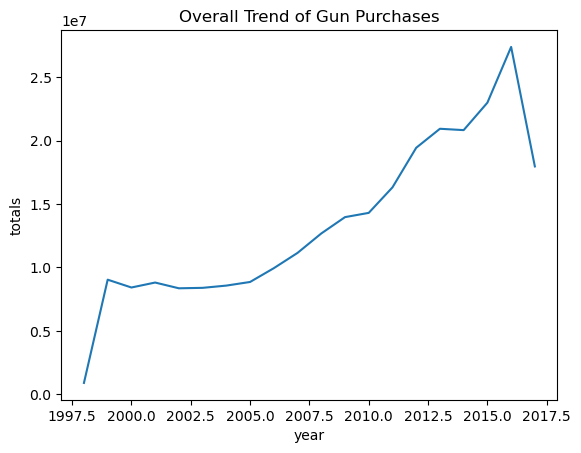

In [63]:
# now we plot the totals number of guns through years so 
# we get a good feel about this trend 
line_plot(df_line,'year','totals','Overall Trend of Gun Purchases')

<h3> as we can see its growing trend with two peaks one around 1998 and 2016
although it slows down with sharp decrease in 2017 as we can see.

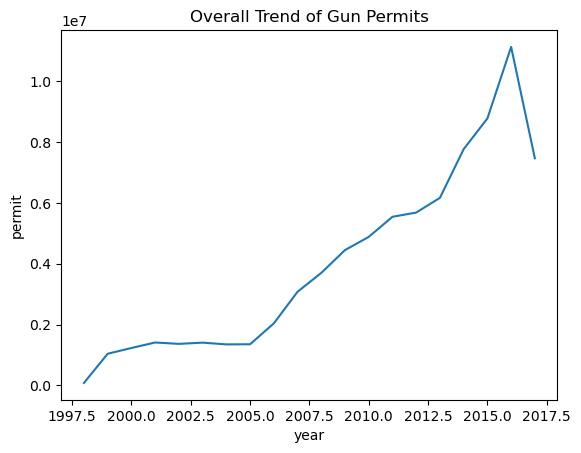

In [64]:
line_plot(df_line,'year','permit','Overall Trend of Gun Permits')

<h3> as we can see its growing trend too as in previous with one peak  in 2016
although it slows down also  with sharp decrease in 2017 as we can see.

<hr>
<hr>

### Research Question 2  
### Which states have had the highest growth in gun registrations?

In [39]:
# let group our data and see
df_gun_clean.groupby(['year','state']).sum()

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\1688906.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gun_clean.groupby(['year','state']).sum()


permit  totals
year state                          
1998 Alabama             0.0   36568
     Alaska              4.0    3985
     Arizona          1733.0   17453
     Arkansas            0.0   21752
     California       5366.0   67445
...                      ...     ...
2017 Virginia         9107.0  366994
     Washington     119467.0  419522
     West Virginia   19079.0  152784
     Wisconsin      137868.0  387537
     Wyoming          3447.0   37736

[1000 rows x 2 columns]

In [40]:
# as we can see its larg data sets 
# so i will choose top 5 states in permit numbers 
# and trak their record through 10 yeas to make scope managable 

# make new data fram for this Q name it df_gun_growth
# we will choose 3 columns that we need to make our top5 later 
df_gun_growth =df_gun_clean[['year','state','permit']].copy()
df_gun_growth.head()

,year,state,permit
0,2017,Alabama,16717.0
1,2017,Alaska,209.0
2,2017,Arizona,5069.0
3,2017,Arkansas,2935.0
4,2017,California,57839.0


In [41]:
# group our data by state and sum all permit 
# then sort them ascending and take top 5 
df_top5 = df_gun_growth.groupby(['state']).sum().sort_values(by=['permit'], axis = 0, ascending = False).head(5).copy()
df_top5

,year,permit
state,,
Kentucky,455769,24926779.0
Illinois,455769,9498639.0
California,455769,6530543.0
North Carolina,455769,3872974.0
Michigan,455769,3313076.0


In [42]:
# lets drop year columns becuse it has no meaning here
df_top5.drop('year',axis=1,inplace=True)
df_top5

,permit
state,
Kentucky,24926779.0
Illinois,9498639.0
California,6530543.0
North Carolina,3872974.0
Michigan,3313076.0


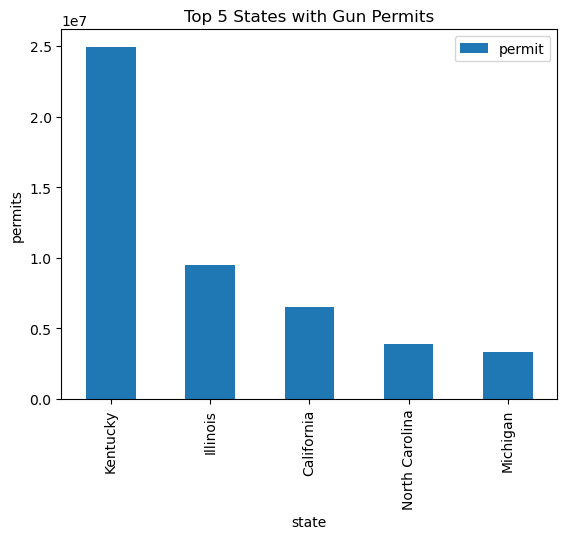

In [66]:
# lets see bar chart to get a sense of differnc betweeb them 
df_top5.plot(kind='bar').set_title('Top 5 States with Gun Permits')
plt.ylabel('permits')
plt.show()

In [44]:
# as we can see Kentucky has the lead 
# we will see the trend of permit in theis 5 states to know the answer to our Q 
# Which states have had the highest growth in gun registrations?


In [45]:
# getting the list of states 
df_top5.index

Index(['Kentucky', 'Illinois', 'California', 'North Carolina', 'Michigan'], dtype='object', name='state')

In [46]:
# getting the data for these 5 only 
df_top5_states = df_gun_growth.query("state == 'Kentucky' | state == 'Illinois' | state == 'California'| state == 'North Carolina'| state == 'North Carolina'| state == 'Michigan'")
df_top5_states

,year,state,permit
4,2017,California,57839.0
14,2017,Illinois,15712.0
18,2017,Kentucky,378384.0
24,2017,Michigan,16571.0
35,2017,North Carolina,19292.0
...,...,...,...
12434,1998,California,434.0
12444,1998,Illinois,4.0
12448,1998,Kentucky,0.0
12454,1998,Michigan,579.0


In [47]:
# limitting the years to 10 years also 
df_top5_states= df_top5_states[(df_top5_states['year'] > 2006) & (df_top5_states['year'] <= 2017)]
df_top5_states

,year,state,permit
4,2017,California,57839.0
14,2017,Illinois,15712.0
18,2017,Kentucky,378384.0
24,2017,Michigan,16571.0
35,2017,North Carolina,19292.0
...,...,...,...
7044,2007,California,16445.0
7054,2007,Illinois,35972.0
7058,2007,Kentucky,105742.0
7064,2007,Michigan,13629.0


In [48]:
# now we can see the which state has the highest growth in these 5 


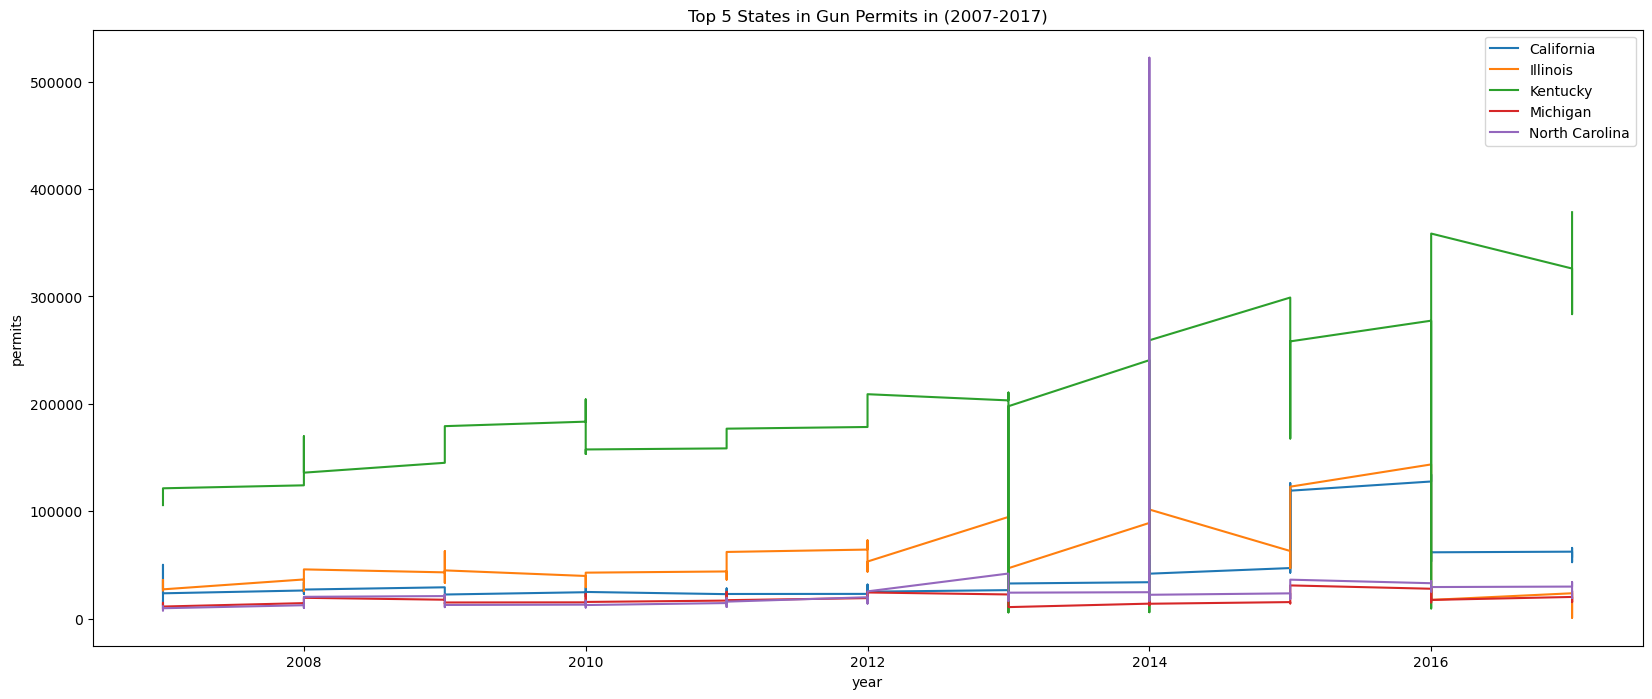

In [68]:
#define index column
df_top5_year = df_top5_states.set_index('year')

#group data by product and display sales as line chart
plt.figure(figsize=(20,8))
df_top5_year.groupby('state')['permit'].plot(kind='line', legend=True)
plt.title('Top 5 States in Gun Permits in (2007-2017)')
plt.ylabel('permits')
plt.show()

#### Kentucky is the Highest state in all of USA with North Carolina taking the top rank in 2014 only 
#### so the answer to our Q is "Kentucky" 

<hr>
<hr>

### Research Question 3  
### What census data is most associated with high gun per capita? 

In [50]:
# to answer this Q we need 2 info 
# 1- population
# 2- total num of guns which we can only get  in 2016 and 2010
# so we will calculate the gun per capita for these 2 years only 

In [51]:
# get 2016 and 2010 data from df_gun_clean 
# so we can extrcat the total num of guns in these two years 
df_gun_10 = df_gun_clean.query(" year == 2010")
df_gun_16 = df_gun_clean.query(" year == 2016")

In [52]:
# checkin 
df_gun_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 495 to 1154
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    600 non-null    datetime64[ns]
 1   state   600 non-null    object        
 2   permit  600 non-null    float64       
 3   totals  600 non-null    int64         
 4   year    600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.1+ KB


In [53]:
# checkin 
df_gun_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 4455 to 5114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    600 non-null    datetime64[ns]
 1   state   600 non-null    object        
 2   permit  600 non-null    float64       
 3   totals  600 non-null    int64         
 4   year    600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.1+ KB


In [54]:
# group our data at state level 
df_gun_16 = df_gun_16.groupby('state').sum()
df_gun_10 = df_gun_10.groupby('state').sum()

C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\1360375285.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gun_16 = df_gun_16.groupby('state').sum()
C:\Users\engsa\AppData\Local\Temp\ipykernel_22676\1360375285.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gun_10 = df_gun_10.groupby('state').sum()


In [55]:
df_gun_10

,permit,totals,year
state,,,
Alabama,4621.0,308607,24120
Alaska,0.0,65909,24120
Arizona,24751.0,206050,24120
Arkansas,31305.0,191448,24120
California,295252.0,816399,24120
Colorado,12928.0,300820,24120
Connecticut,90942.0,179595,24120
Delaware,0.0,19240,24120
Florida,35.0,559347,24120


In [56]:
# dropping year and permit columns 
df_gun_10.drop(['year','permit'],axis=1,inplace=True)
df_gun_16.drop(['year','permit'],axis=1,inplace=True)

In [57]:
df_gun_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   totals  50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes


In [58]:
# now lets calculate the gunper capita in 2010
df_gun_cap_10 = df_gun_10['totals'] / df_pop['pop_2010']
df_gun_cap_10 

state
Alabama           0.064560
Alaska            0.092797
Arizona           0.032234
Arkansas          0.065654
California        0.021914
Colorado          0.059813
Connecticut       0.050249
Delaware          0.021427
Florida           0.029745
Georgia           0.034396
Hawaii            0.007743
Idaho             0.058706
Illinois          0.054187
Indiana           0.053307
Iowa              0.040940
Kansas            0.050526
Kentucky          0.549756
Louisiana         0.052764
Maine             0.049676
Maryland          0.015269
Massachusetts     0.017701
Michigan          0.035228
Minnesota         0.056070
Mississippi       0.057233
Missouri          0.058386
Montana           0.102177
Nebraska          0.031913
Nevada            0.038801
New Hampshire     0.060723
New Jersey        0.005746
New Mexico        0.052967
New York          0.012462
North Carolina    0.034779
North Dakota      0.070002
Ohio              0.034087
Oklahoma          0.062349
Oregon            0.04

In [59]:
df_gun_cap_16 = df_gun_16['totals'] / df_pop['pop_2016']

In [60]:
# to get the states that has the high gun percapita in 2016
df_gun_cap_16.nlargest(5)

state
Kentucky         0.828683
Indiana          0.216601
Illinois         0.150300
West Virginia    0.132352
Montana          0.130776
dtype: float64

In [61]:
# to get the states that has the high gun percapita in 2010
df_gun_cap_10.nlargest(5)

state
Kentucky         0.549756
Utah             0.200129
Montana          0.102177
Alaska           0.092797
West Virginia    0.086103
dtype: float64

<a id='conclusions'></a>
## Conclusions

> Finally, we answer the 3 Questions that we have 
    1. What is the overall trend of gun purchases?
        it's growing trend but slows down in 2017
    2. Which states have had the highest growth in gun registrations? 
        Kentucky is the biggest state on guns and also gun per capita 

> limitations, no advanced model has implemented and more population data where need to get trend for gun per captia . 
